In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv(r"C:\Users\VARKEY JOSHY T\Downloads\nlp_dataset.csv")

# Split the data into features and target
X = df['Comment']
y = df['Emotion']

# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(filtered_tokens)

X_preprocessed = X.apply(preprocess_text)

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X_preprocessed)

In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_tfidf, y)

# Train SVM model
svm_model = SVC()
svm_model.fit(X_tfidf, y)

SVC()

Naive Bayes Accuracy: 0.9074
Naive Bayes F1-score: 0.9074
SVM Accuracy: 0.9377
SVM F1-score: 0.9378


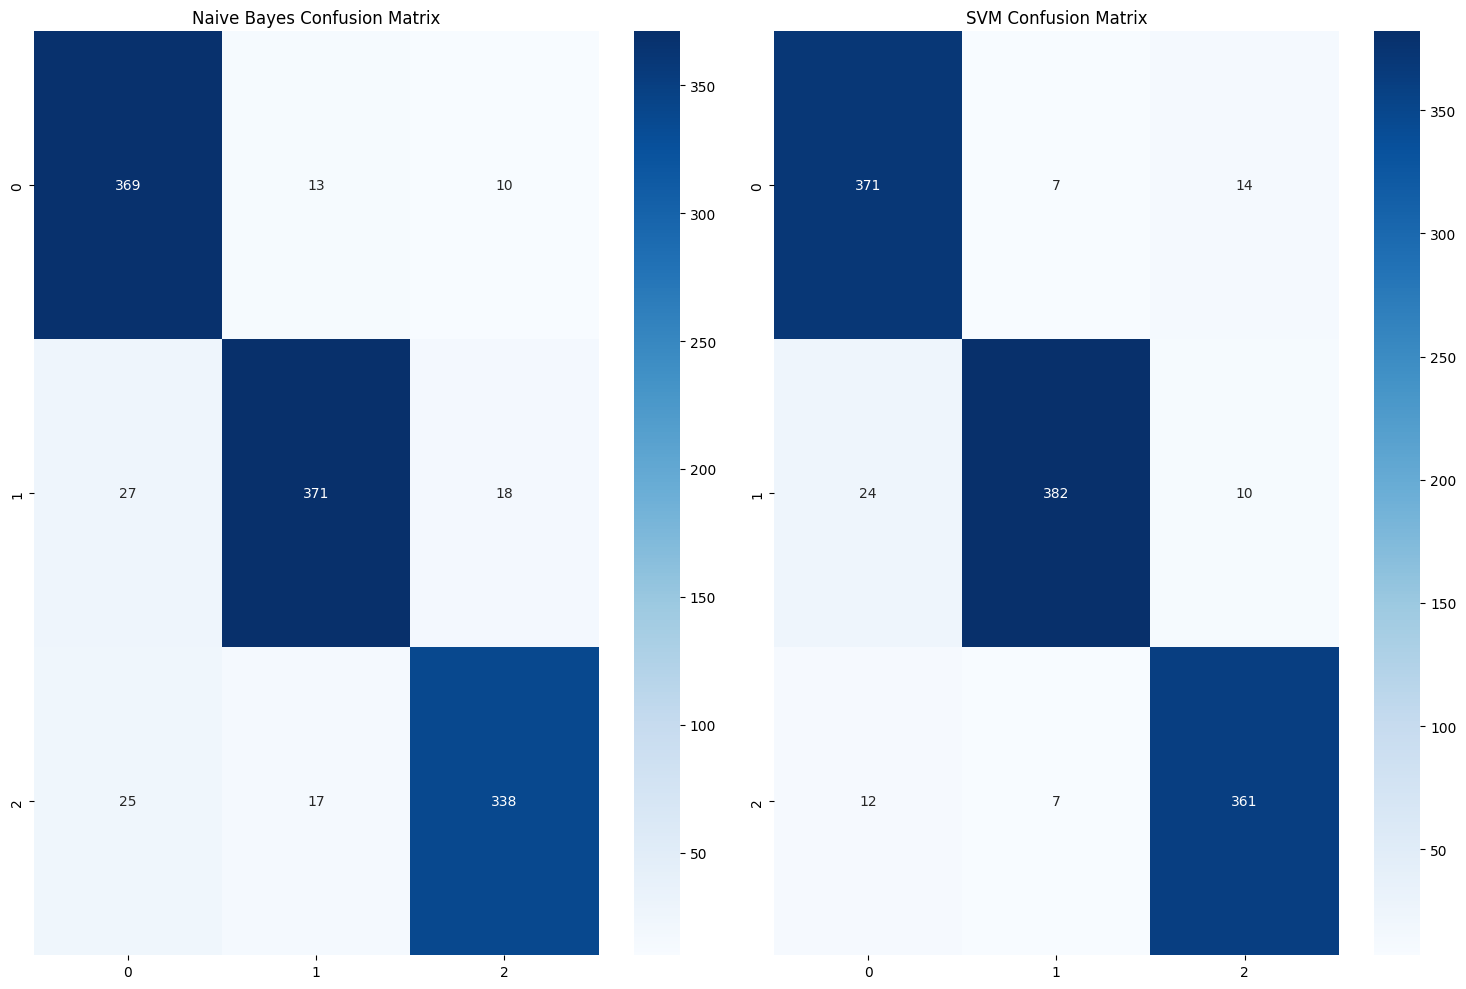


Classification Report - Naive Bayes:
              precision    recall  f1-score   support

       anger       0.88      0.94      0.91       392
        fear       0.93      0.89      0.91       416
         joy       0.92      0.89      0.91       380

    accuracy                           0.91      1188
   macro avg       0.91      0.91      0.91      1188
weighted avg       0.91      0.91      0.91      1188


Classification Report - SVM:
              precision    recall  f1-score   support

       anger       0.91      0.95      0.93       392
        fear       0.96      0.92      0.94       416
         joy       0.94      0.95      0.94       380

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188



In [14]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Calculate metrics
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred, average='weighted')
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred, average='weighted')

print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print(f"Naive Bayes F1-score: {nb_f1:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"SVM F1-score: {svm_f1:.4f}")

# Plot confusion matrices
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
cm_nb = confusion_matrix(y_test, nb_pred)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')

plt.subplot(1, 2, 2)
cm_svm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')

plt.tight_layout()
plt.show()

# Classification Report
print("\nClassification Report - Naive Bayes:")
print(classification_report(y_test, nb_pred))

print("\nClassification Report - SVM:")
print(classification_report(y_test, svm_pred))


In [8]:
nb_avg_f1 = f1_score(y_test, nb_pred, average='weighted')
svm_avg_f1 = f1_score(y_test, svm_pred, average='weighted')

print(f"Naive Bayes Average F1-score: {nb_avg_f1:.4f}")
print(f"SVM Average F1-score: {svm_avg_f1:.4f}")


Naive Bayes Average F1-score: 0.9074
SVM Average F1-score: 0.9378
